<a href="https://colab.research.google.com/github/lcsgaldino/assets/blob/main/VideoGames_AnaliseExp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Vendas de Videogames - Análise exploratória

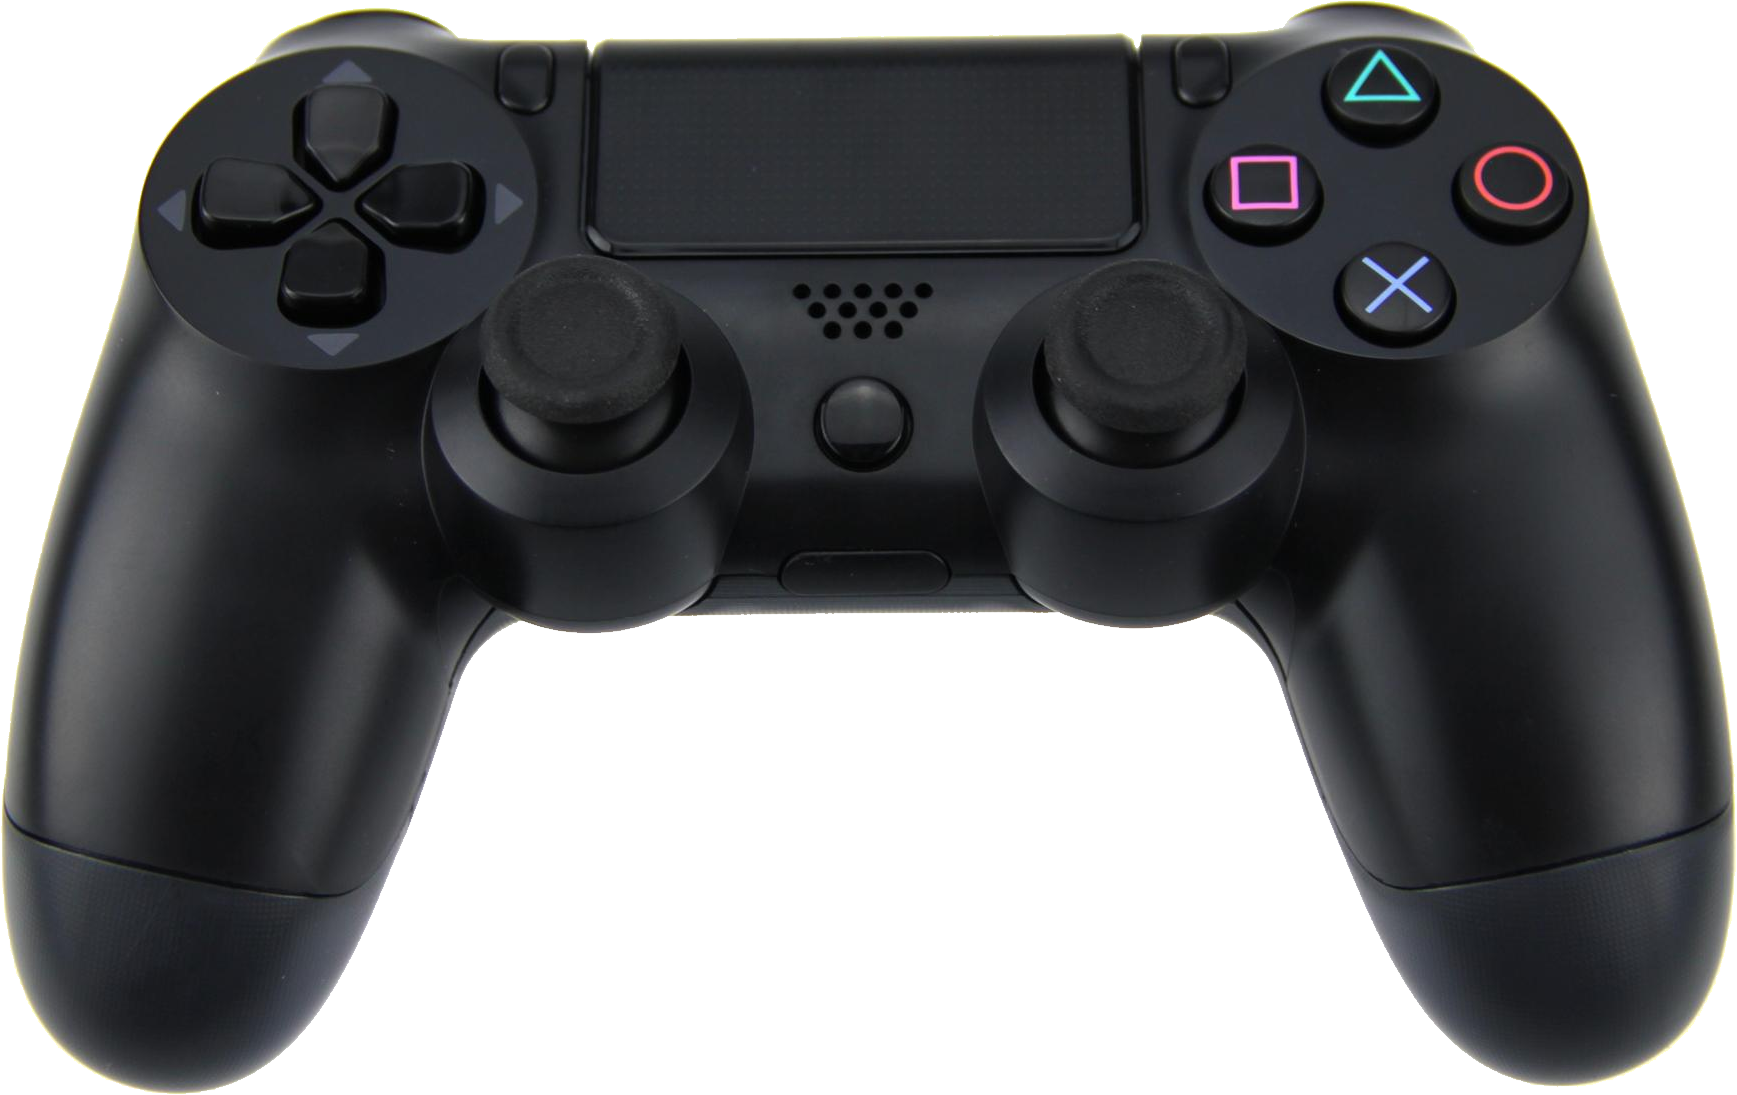

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [37]:
df = pd.read_csv('vgsales.csv')

In [38]:
df.head(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


#Análise por gênero de games 

In [39]:
df.value_counts('Genre')

Genre
Action          3316
Sports          2346
Misc            1739
Role-Playing    1488
Shooter         1310
Adventure       1286
Racing          1249
Platform         886
Simulation       867
Fighting         848
Strategy         681
Puzzle           582
dtype: int64

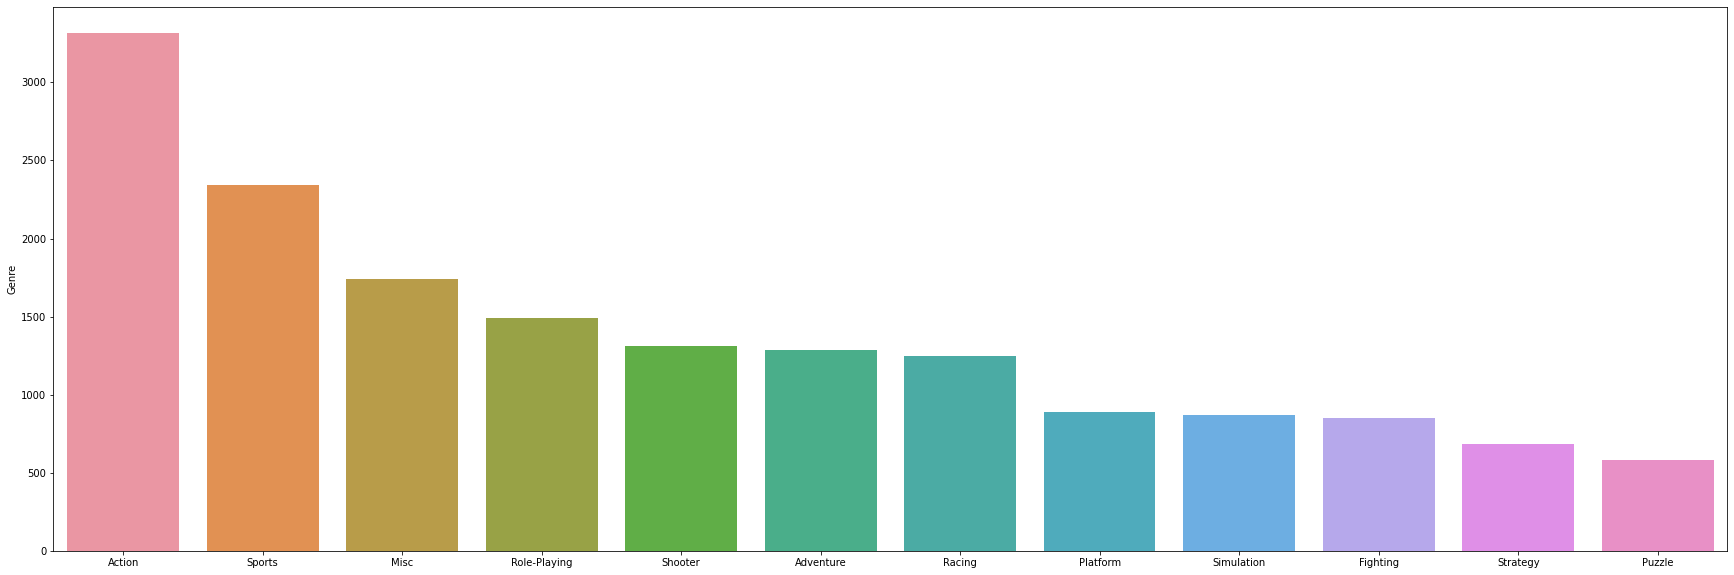

In [40]:
plt.figure(figsize=(30, 10))
sns.barplot(x=df.Genre.value_counts().index, y=df.Genre.value_counts())


# Análise de Plataformas

In [41]:
df.value_counts('Platform')

Platform
DS      2163
PS2     2161
PS3     1329
Wii     1325
X360    1265
PSP     1213
PS      1196
PC       960
XB       824
GBA      822
GC       556
3DS      509
PSV      413
PS4      336
N64      319
SNES     239
XOne     213
SAT      173
WiiU     143
2600     133
NES       98
GB        98
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
PCFX       1
GG         1
dtype: int64

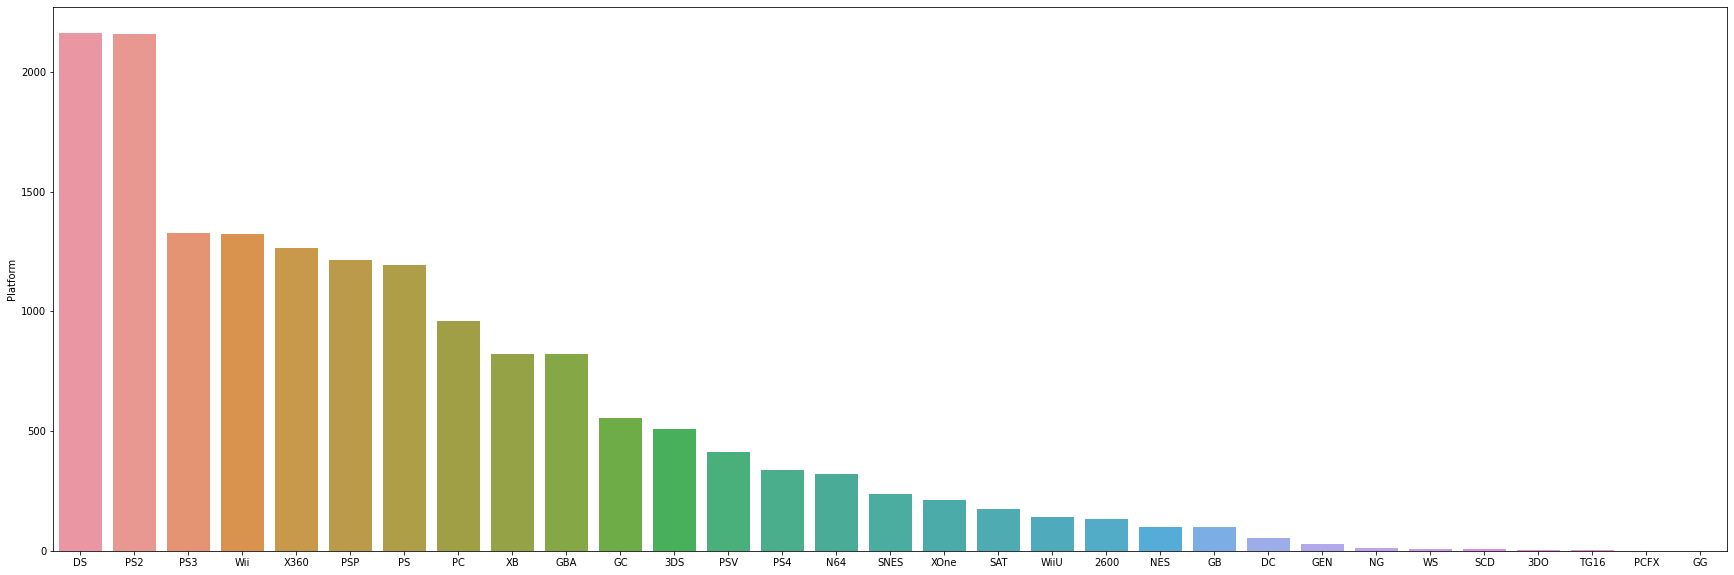

In [42]:
plt.figure(figsize=(30, 10))
sns.barplot(x=df.Platform.value_counts().index, y=df.Platform.value_counts())

# TOP 5 - Games mais vendidos

In [43]:
top5_all_time = df[['Global_Sales','Name']].groupby('Name').sum().sort_values(by='Global_Sales', ascending=False).head()
top5_all_time

,Global_Sales
Name,
Wii Sports,82.74
Grand Theft Auto V,55.92
Super Mario Bros.,45.31
Tetris,35.84
Mario Kart Wii,35.82


# Cenário de vendas - Activison e Nintendo

In [44]:
col=['Publisher','Year','Global_Sales']
df=df.loc[(df.Publisher.isin(['Activision','Nintendo'])) & (df.Year>=2006),col]
df.head()

,Publisher,Year,Global_Sales
0,Nintendo,2006.0,82.74
2,Nintendo,2008.0,35.82
3,Nintendo,2009.0,33.00
6,Nintendo,2006.0,30.01
7,Nintendo,2006.0,29.02


In [45]:
df_1=df.groupby(['Publisher','Year']).Global_Sales.sum()
print(df_1)
type(df_1)

Publisher   Year  
Activision  2006.0     17.40
            2007.0     63.57
            2008.0     67.41
            2009.0     78.06
            2010.0     63.39
            2011.0     51.74
            2012.0     53.25
            2013.0     43.49
            2014.0     44.48
            2015.0     35.63
            2016.0      3.67
Nintendo    2006.0    205.61
            2007.0    104.18
            2008.0     91.22
            2009.0    128.89
            2010.0     61.07
            2011.0     51.53
            2012.0     56.47
            2013.0     52.79
            2014.0     48.65
            2015.0     27.08
            2016.0      3.47
Name: Global_Sales, dtype: float64


pandas.core.series.Series

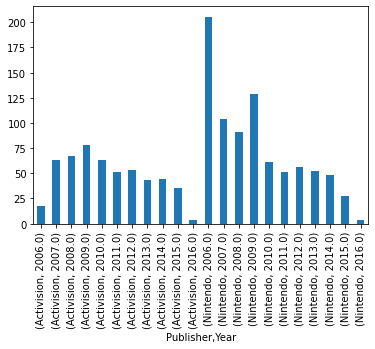

In [46]:
df_1.plot(kind='bar')

In [48]:
df_2=df_1.reset_index()
#print(df_2)
df_3=pd.DataFrame(df_2)
df_3.head()

,Publisher,Year,Global_Sales
0,Activision,2006.0,17.40
1,Activision,2007.0,63.57
2,Activision,2008.0,67.41
3,Activision,2009.0,78.06
4,Activision,2010.0,63.39


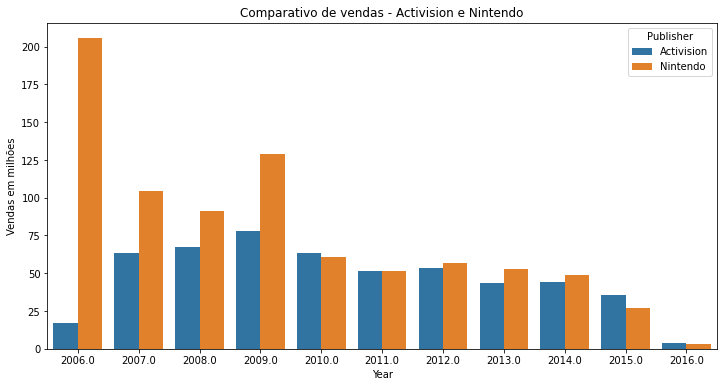

In [51]:
plt.figure(figsize=(12,6))
plt.title('Comparativo de vendas - Activision e Nintendo')
sns.barplot(x="Year", y="Global_Sales", hue="Publisher", data=df_3)
plt.ylabel('Vendas em milhões')
plt.show()